In [5]:
import warnings
warnings.filterwarnings('ignore')

import datetime
import pandas as pd
import matplotlib.pyplot as plt
from aiapy.calibrate import normalize_exposure, register, update_pointing

import astropy.io.fits as fits
from astropy import units as u
from astropy.visualization import ImageNormalize, SqrtStretch, PercentileInterval

import sunpy.map
from sunpy.net import Fido, attrs as a

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

In [16]:
year = '2021'
month = '09'
day = '18'

start_time = pd.Timestamp(f'{year}-{month}-{day} 00:00:00')
end_time = start_time + datetime.timedelta(minutes=1)

# Active region corona
result211 = Fido.search(a.Time(start_time, end_time),
                            a.Instrument('AIA'),
                            a.Wavelength(211*u.angstrom),
                            a.Sample(1*u.min))
aia211 = Fido.fetch(result211, path='./{instrument}/{file}')

# Corona and hot flare plasma
result193 = Fido.search(a.Time(start_time, end_time),
                            a.Instrument('AIA'),
                            a.Wavelength(193*u.angstrom),
                            a.Sample(1*u.min))
aia193 = Fido.fetch(result193, path='./{instrument}/{file}')

# Quiet corona, upper transition region
result171 = Fido.search(a.Time(start_time, end_time),
                            a.Instrument('AIA'),
                            a.Wavelength(171*u.angstrom),
                            a.Sample(1*u.min))
aia171 = Fido.fetch(result171, path='./{instrument}/{file}')

# Flaring regions
result94 = Fido.search(a.Time(start_time, end_time),
                            a.Instrument('AIA'),
                            a.Wavelength(94*u.angstrom),
                            a.Sample(1*u.min))
aia94 = Fido.fetch(result94, path='./{instrument}/{file}')

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia_lev1_171a_2021_09_18t00_00_09_35z_image_lev1.fits:   0%|          | 0.00/11.6M [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia_lev1_94a_2021_09_18t00_00_11_12z_image_lev1.fits:   0%|          | 0.00/10.5M [00:00<?, ?B/s]

In [17]:
# calibrate AIA map to level 1.5
m211 = sunpy.map.Map(aia211)
m211_updated_pointing = update_pointing(m211)
m211_registered = register(m211_updated_pointing)
m211_normalized = normalize_exposure(m211_registered)

m193 = sunpy.map.Map(aia193)
m193_updated_pointing = update_pointing(m193)
m193_registered = register(m193_updated_pointing)
m193_normalized = normalize_exposure(m193_registered)

m171 = sunpy.map.Map(aia171)
m171_updated_pointing = update_pointing(m171)
m171_registered = register(m171_updated_pointing)
m171_normalized = normalize_exposure(m171_registered)

m94 = sunpy.map.Map(aia94)
m94_updated_pointing = update_pointing(m94)
m94_registered = register(m94_updated_pointing)
m94_normalized = normalize_exposure(m94_registered)

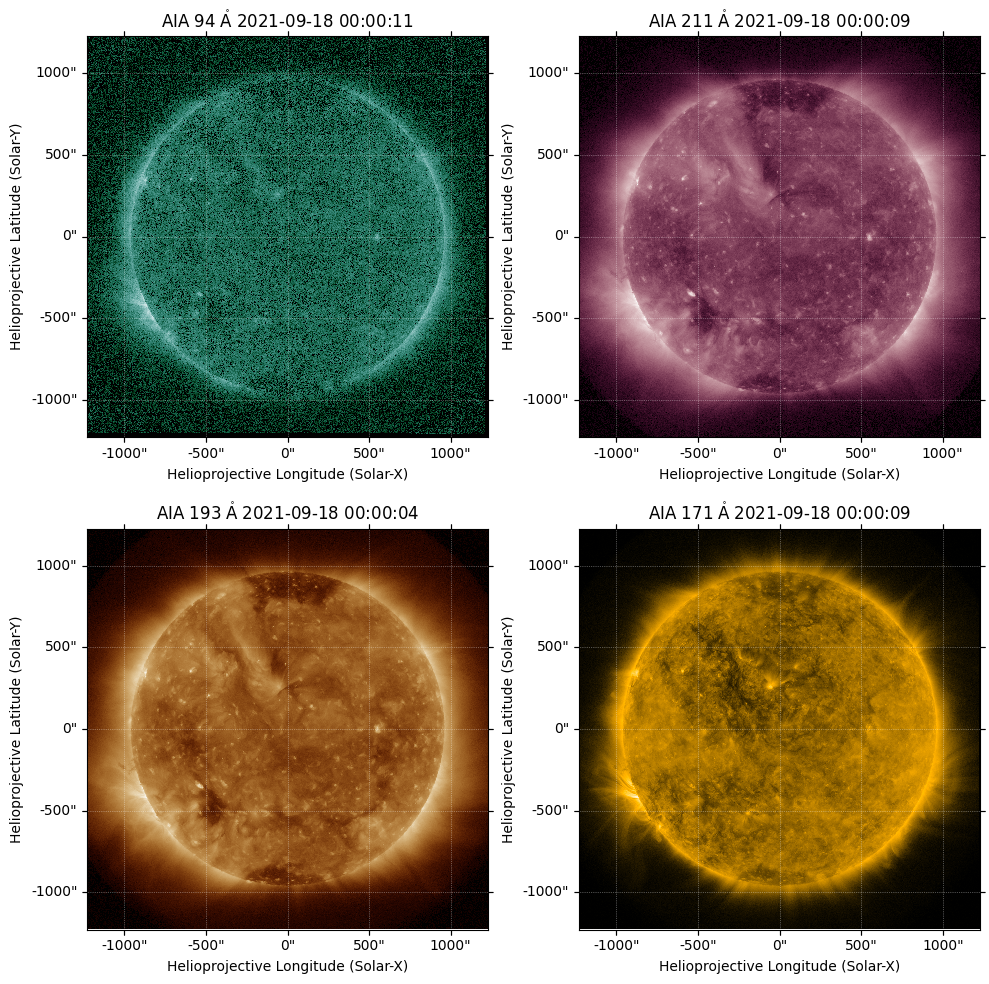

In [18]:
fig = plt.figure(figsize=[10,10])

ax = fig.add_subplot(221, projection=m94_normalized)
m94_normalized.plot(axes=ax, vmin=0)

ax = fig.add_subplot(222, projection=m211_normalized)
m211_normalized.plot(axes=ax, vmin=0)

ax = fig.add_subplot(223, projection=m193_normalized)
m193_normalized.plot(axes=ax, vmin=0)

ax = fig.add_subplot(224, projection=m171_normalized)
m171_normalized.plot(axes=ax, vmin=0)

fig.tight_layout()
plt.show()

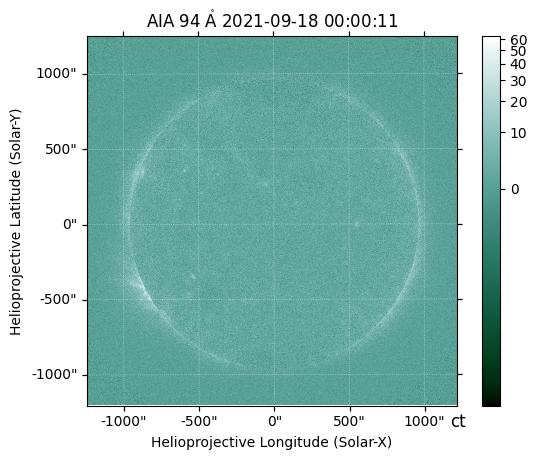

In [21]:
# check individual maps before calibration
m94.peek()

In [3]:
import warnings
warnings.filterwarnings('ignore')

from astropy import units as u
from sunpy.net import Fido, attrs as a




year = '2021'
month = '09'
start_day = '18'
end_day = '19'
channel = 94

aia_result = Fido.search(a.Time(f'{year}-{month}-{start_day}', f'{year}-{month}-{end_day}'),
                                 a.Instrument('AIA'),
                                 a.Wavelength(channel*u.angstrom),
                                 a.Sample(1*u.min))

aia_files = Fido.fetch(aia_result, path='./{instrument}/{file}')

print('AIA data is fetched sccessfully!')

Files Downloaded:   0%|          | 0/1440 [00:00<?, ?file/s]

AIA data is fetched sccessfully!
